# Setup

## Importing Packages

In [1]:
import pandas as pd 
import numpy as np
import json
import os
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


## Loading Data

In [2]:
# Define base paths
PROCESSED_PATH = os.path.join('..', 'data', 'processed')
TRIPS_PATH = os.path.join(PROCESSED_PATH, 'trips_data2.csv')
WEATHER_PATH = os.path.join(PROCESSED_PATH, 'processed_weather_features.csv')

# Read data directly
trip_df = pd.read_csv(TRIPS_PATH)
weather_df = pd.read_csv(WEATHER_PATH)

In [3]:
def dataframe_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Count', 'Unique Sample', 'Missing Values', 'Missing Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        unique_count = df[column].nunique()
        unique_sample = df[column].unique()[:5]
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report = pd.concat([report, pd.DataFrame({'Column': [column],
                                                      'Data Type': [data_type],
                                                      'Unique Count': [unique_count],
                                                      'Unique Sample': [unique_sample],
                                                      'Missing Values': [missing_values],
                                                      'Missing Percentage': [missing_percentage.round(4)]})],
                             ignore_index=True)
    return report

In [4]:
dataframe_info(weather_df)

C:\Users\USER\AppData\Local\Temp\ipykernel_19408\3841810920.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, pd.DataFrame({'Column': [column],


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage
0,date,object,243,"[2024-02-01, 2024-02-02, 2024-02-03, 2024-02-0...",0,0.0000
1,time,object,8,"[00:00, 03:00, 06:00, 09:00, 12:00]",0,0.0000
2,temperature,int64,18,"[18, 27, 28, 26, 24]",0,0.0000
3,feels_like,int64,18,"[18, 29, 32, 26, 19]",0,0.0000
4,precip_mm,float64,48,"[0.2, 0.0, 1.0, 0.9, 3.9]",0,0.0000
5,humidity,int64,67,"[92, 90, 71, 75, 88]",0,0.0000
6,visibility,int64,8,"[9, 10, 7, 2, 5]",0,0.0000
7,pressure,int64,11,"[1014, 1013, 1012, 1011, 1015]",0,0.0000
8,cloud_cover,int64,101,"[76, 27, 40, 74, 59]",0,0.0000
9,wind_speed,int64,11,"[4, 5, 3, 2, 0]",0,0.0000


In [5]:
dataframe_info(trip_df)

C:\Users\USER\AppData\Local\Temp\ipykernel_19408\3841810920.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, pd.DataFrame({'Column': [column],


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage
0,route_id,int64,2,"[10, 11]",0,0.0
1,start_time,object,1072,"[2024-02-01 06:54:08, 2024-02-01 07:00:07, 202...",0,0.0
2,end_time,object,1072,"[2024-02-01 07:00:07, 2024-02-01 07:09:44, 202...",0,0.0
3,start_hour,int64,5,"[6, 7, 16, 15, 17]",0,0.0
4,end_hour,int64,5,"[7, 6, 16, 17, 15]",0,0.0
5,start_stop,object,6,"[SPBU Tlogomas, SD Dinoyo 2, SMA 8, MAN 2, SMA...",0,0.0
6,end_stop,object,6,"[SD Dinoyo 2, SMA 8, MAN 2, SMA Dempo, SMP 4]",0,0.0
7,start_stop_id,object,7,"[BT01, BT02, BT03, BT04, BT05]",0,0.0
8,end_stop_id,object,7,"[BT02, BT03, BT04, BT05, BT06]",0,0.0
9,start_lat,float64,7,"[-7.93324, -7.94329, -7.94979, -7.95658, -7.96...",0,0.0


## Feature Extraction 

In [6]:
def calculate_operation_minutes(start_time):
    morning_start = pd.Timestamp(start_time.date()).replace(hour=6, minute=30)
    afternoon_start = pd.Timestamp(start_time.date()).replace(hour=15, minute=0)
    
    if start_time < afternoon_start:  # Morning session
        return max(0, (start_time - morning_start).total_seconds() // 60 + 1)
    else:  # Afternoon session
        return (start_time - afternoon_start).total_seconds() // 60 + 181
    
def preprocess_weather_data(df):
    # Convert date and time columns to datetime
    df['datetime'] = pd.to_datetime(df['date'])
    
    # Drop unnecessary columns
    columns_to_drop = ['date', 'time', 'month']
    df = df.drop(columns=columns_to_drop)
    
    return df

# Convert start_time and end_time to datetime
trip_df['start_time'] = pd.to_datetime(trip_df['start_time'])
trip_df['end_time'] = pd.to_datetime(trip_df['end_time'])

# Extract day of week and month
trip_df['day_of_week'] = trip_df['start_time'].dt.dayofweek
trip_df['month'] = trip_df['start_time'].dt.month
    
# Remove rows with zero distance or duration
trip_df = trip_df[(trip_df['distance'] > 0) & (trip_df['duration'] > 0)]
    
# Cyclic encoding for day of week
trip_df['day_of_week_sin'] = np.sin(trip_df['day_of_week'] * (2 * np.pi / 7))
trip_df['day_of_week_cos'] = np.cos(trip_df['day_of_week'] * (2 * np.pi / 7))

# Calculate minutes of operation
trip_df['minutes_of_operation'] = trip_df['start_time'].apply(calculate_operation_minutes)
    
# Cyclic encoding for minutes of operation
trip_df['minutes_sin'] = np.sin(2 * np.pi * trip_df['minutes_of_operation'] / 360)
trip_df['minutes_cos'] = np.cos(2 * np.pi * trip_df['minutes_of_operation'] / 360)

weather_df = preprocess_weather_data(weather_df)

# Merge GPS and weather data
merged_df = pd.merge_asof(trip_df.sort_values('start_time'), 
                          weather_df.sort_values('datetime'), 
                          left_on='start_time', 
                          right_on='datetime', 
                          direction='nearest').drop('datetime', axis=1)

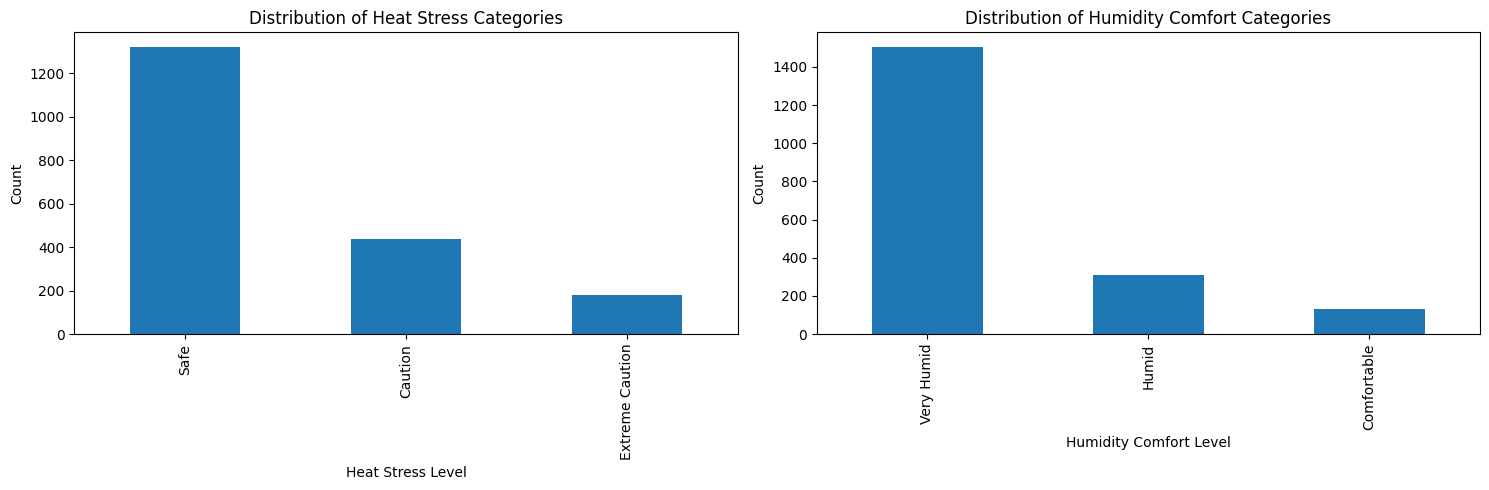

In [7]:
# Visualize distribution of heat_stress and humidity_comfort
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot heat_stress distribution
weather_df['heat_stress'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Distribution of Heat Stress Categories')
ax1.set_xlabel('Heat Stress Level')
ax1.set_ylabel('Count')

# Plot humidity_comfort distribution  
weather_df['humidity_comfort'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Humidity Comfort Categories')
ax2.set_xlabel('Humidity Comfort Level') 
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


## Dropping Features with Missing Values

In [8]:
# Drop columns with missing values
missing_cols = merged_df.columns[merged_df.isnull().any()].tolist()
print("Dropping columns with missing values:", missing_cols)
merged_df = merged_df.drop(columns=missing_cols)

# Drop visibility_cleaned, humidity_cleaned, and wind_speed_cleaned
merged_df = merged_df.drop(columns=['visibility_cleaned', 'humidity_cleaned', 'wind_speed_cleaned'])

Dropping columns with missing values: ['temp_rolling_std', 'temp_change', 'pressure_change']


# Correlation Analysis

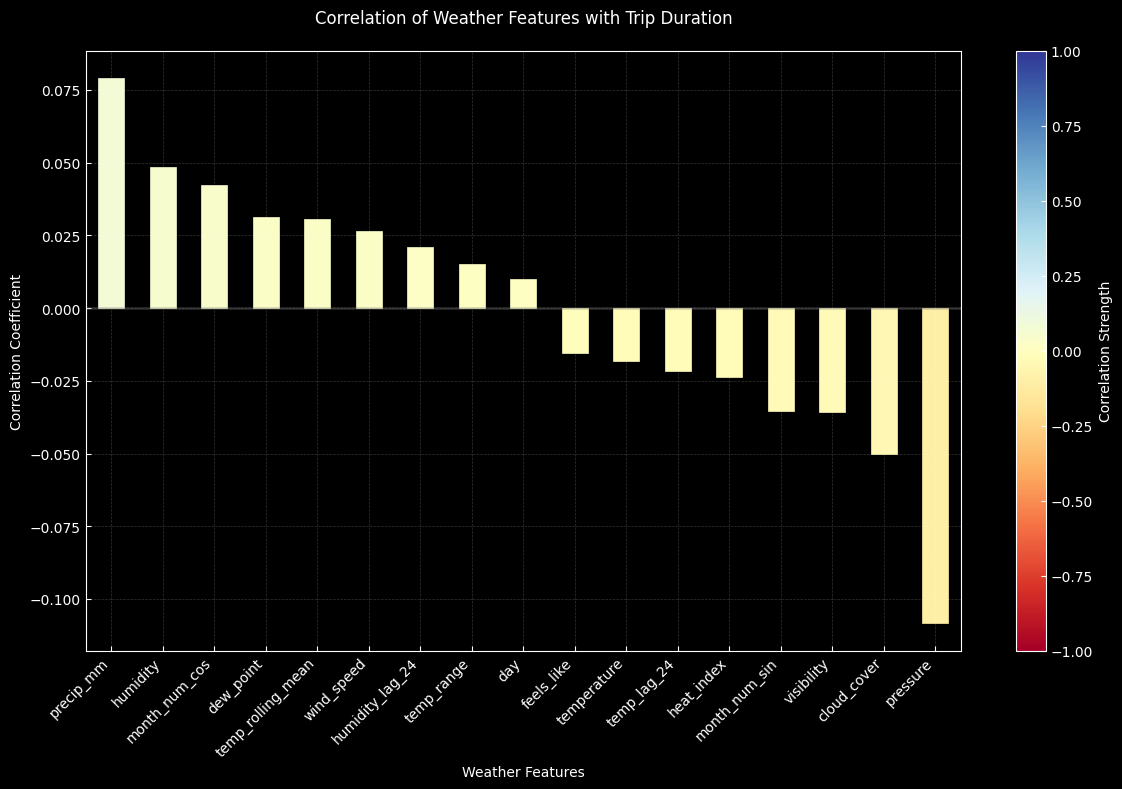

In [13]:
# Get weather features by dropping datetime columns
weather_features = [col for col in weather_df.columns.tolist() 
                   if col not in ['datetime', 'time', 'hour', 'hour_sin', 'hour_cos', 
                                'month_num', 'month_sin', 'month_cos', 'month', 'humidity_comfort', 'heat_stress', 
                                'temp_rolling_std', 'temp_change', 'pressure_change', 'visibility_cleaned', 'humidity_cleaned', 'wind_speed_cleaned']]

# Calculate correlations with duration
weather_correlations = merged_df[weather_features + ['duration']].corr()['duration'].sort_values(ascending=False)

# Remove duration from the correlations for plotting
weather_correlations = weather_correlations[weather_correlations.index != 'duration']

# Set the style to dark background
plt.style.use('dark_background')

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create bar plot
bars = weather_correlations.plot(kind='bar', ax=ax)

# Create a colormap that matches the legend
norm = plt.Normalize(vmin=-1, vmax=1)
cmap = plt.cm.RdYlBu

# Color the bars using the normalized values
colors = cmap(norm(weather_correlations.values))
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)

plt.title('Correlation of Weather Features with Trip Duration', fontsize=12, pad=20)
plt.xlabel('Weather Features', fontsize=10)
plt.ylabel('Correlation Coefficient', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.2)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)  # Add a horizontal line at y=0

# Add a colorbar with the same normalization
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Correlation Strength', fontsize=10)

plt.tight_layout()
plt.show()

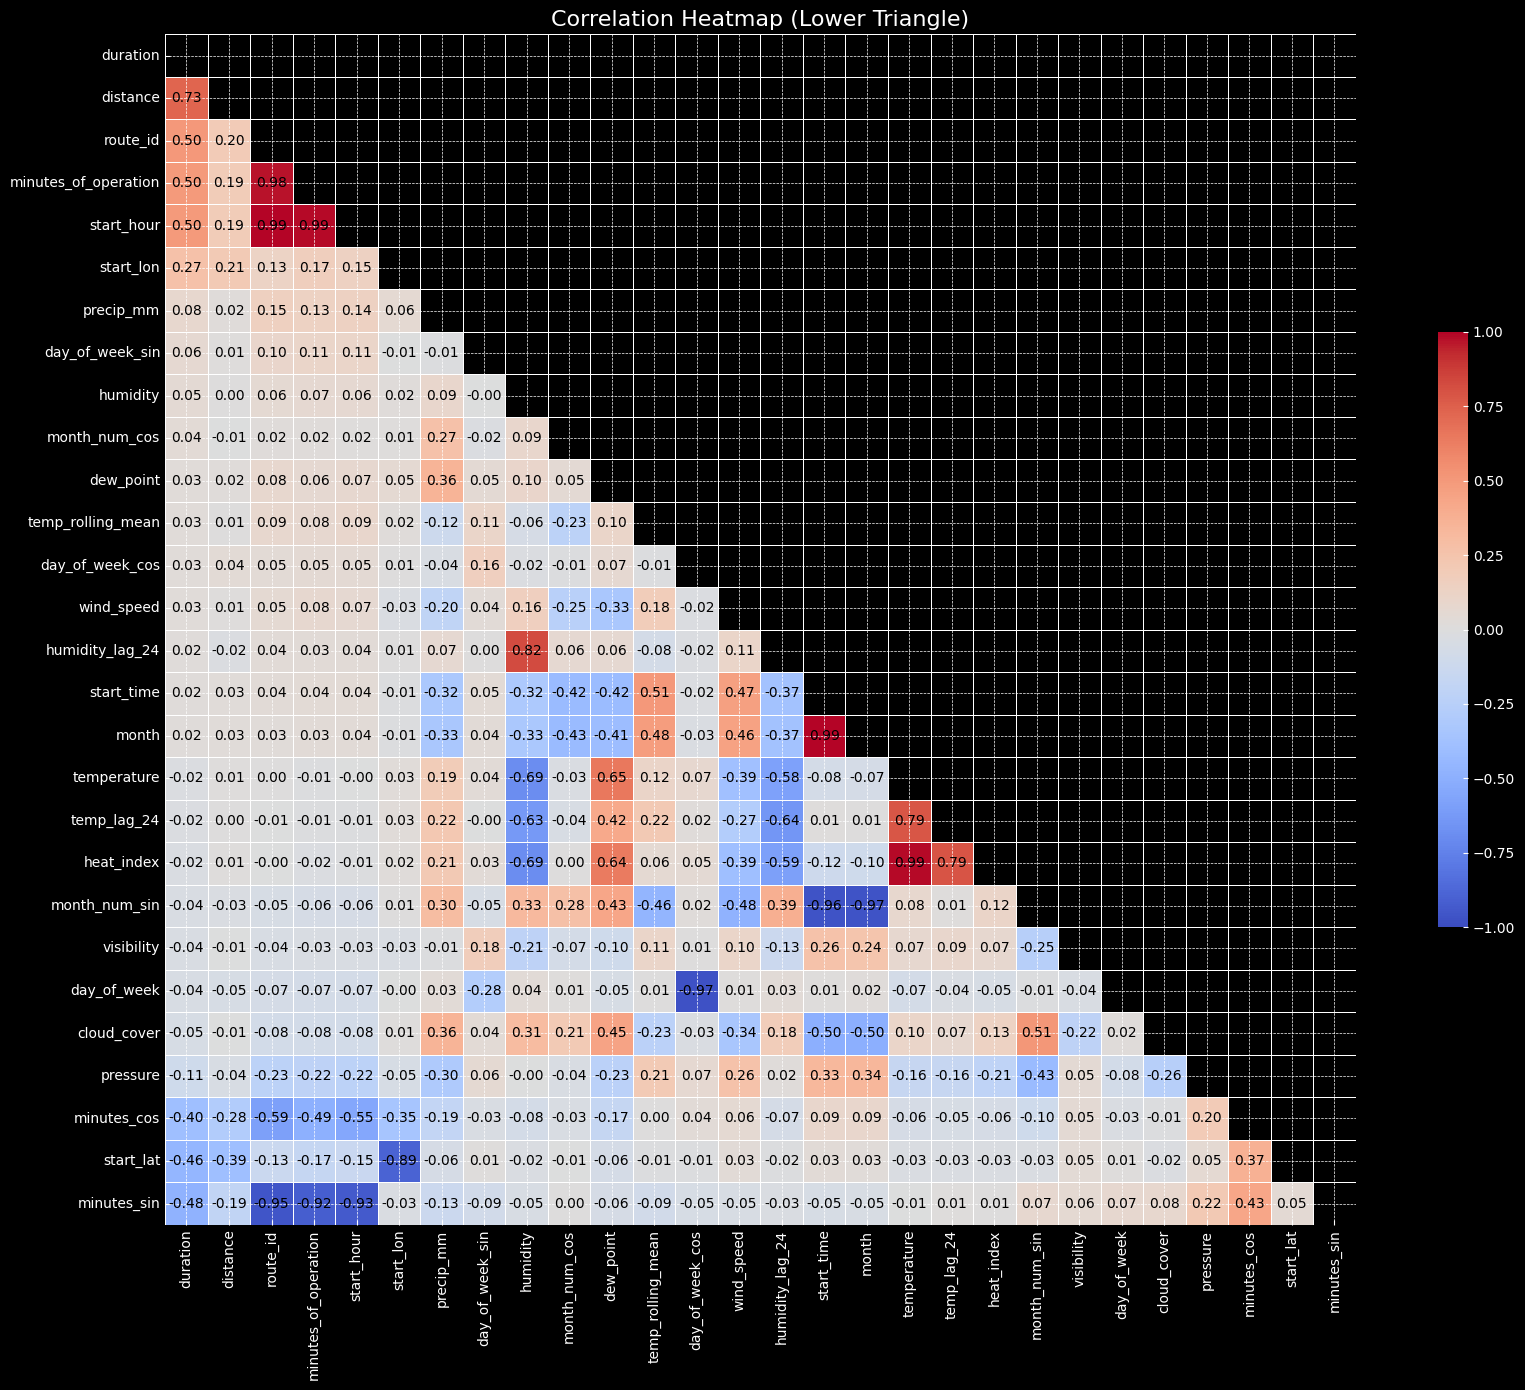


Correlations with duration
duration                1.000000
distance                0.733028
route_id                0.500639
minutes_of_operation    0.498672
start_hour              0.496312
start_lon               0.267076
precip_mm               0.079051
day_of_week_sin         0.063776
humidity                0.048615
month_num_cos           0.042288
dew_point               0.031139
temp_rolling_mean       0.030604
day_of_week_cos         0.029049
wind_speed              0.026545
humidity_lag_24         0.020853
start_time              0.020153
month                   0.019180
temperature            -0.018304
temp_lag_24            -0.021568
heat_index             -0.023585
month_num_sin          -0.035333
visibility             -0.035792
day_of_week            -0.039178
cloud_cover            -0.050194
pressure               -0.108350
minutes_cos            -0.397926
start_lat              -0.460323
minutes_sin            -0.483043
Name: duration, dtype: float64


,route_id,start_time,start_hour,start_lat,start_lon,distance,day_of_week,month,pressure,temp_lag_24,...,humidity_lag_24,dew_point,temp_rolling_mean,wind_speed,day_of_week_sin,day_of_week_cos,minutes_of_operation,minutes_sin,minutes_cos,duration
route_id,1.000000,0.038824,0.992607,-0.134107,0.125318,0.201721,-0.067724,0.030944,-0.226548,-0.005278,...,0.038646,0.079043,0.085308,0.054732,0.100567,0.045631,0.976007,-0.954252,-0.589136,0.500639
start_time,0.038824,1.000000,0.043756,0.032627,-0.014161,0.029275,0.011150,0.992940,0.333184,0.009691,...,-0.368203,-0.417296,0.505457,0.466089,0.045146,-0.020048,0.041299,-0.052184,0.086019,0.020153
start_hour,0.992607,0.043756,1.000000,-0.146780,0.146457,0.191536,-0.070527,0.035809,-0.218761,-0.009697,...,0.038166,0.073206,0.087076,0.065785,0.107159,0.047642,0.990028,-0.934538,-0.550334,0.496312
start_lat,-0.134107,0.032627,-0.146780,1.000000,-0.892187,-0.392779,0.009152,0.030163,0.054820,-0.029652,...,-0.015561,-0.063880,-0.008063,0.032230,0.011059,-0.014248,-0.168258,0.049254,0.374532,-0.460323
start_lon,0.125318,-0.014161,0.146457,-0.892187,1.000000,0.205170,-0.000387,-0.010728,-0.047641,0.028612,...,0.005372,0.054909,0.022663,-0.030179,-0.005387,0.005422,0.169474,-0.026104,-0.347057,0.267076
distance,0.201721,0.029275,0.191536,-0.392779,0.205170,1.000000,-0.047813,0.026674,-0.041252,0.001760,...,-0.019950,0.020169,0.006182,0.009058,0.008210,0.044004,0.193256,-0.189783,-0.282403,0.733028
day_of_week,-0.067724,0.011150,-0.070527,0.009152,-0.000387,-0.047813,1.000000,0.018382,-0.084036,-0.037089,...,0.031807,-0.053064,0.005914,0.014281,-0.279012,-0.969216,-0.073647,0.073712,-0.031197,-0.039178
month,0.030944,0.992940,0.035809,0.030163,-0.010728,0.026674,0.018382,1.000000,0.341410,0.007772,...,-0.374516,-0.413400,0.482390,0.459234,0.038861,-0.026209,0.033653,-0.046033,0.090238,0.019180
pressure,-0.226548,0.333184,-0.218761,0.054820,-0.047641,-0.041252,-0.084036,0.341410,1.000000,-0.158429,...,0.016370,-0.231271,0.206302,0.261921,0.060958,0.067848,-0.215328,0.216843,0.200894,-0.108350
temp_lag_24,-0.005278,0.009691,-0.009697,-0.029652,0.028612,0.001760,-0.037089,0.007772,-0.158429,1.000000,...,-0.642177,0.421031,0.217767,-0.273871,-0.001152,0.020267,-0.014530,0.012723,-0.048438,-0.021568


In [14]:
def correlation_heatmap(data, target_column='duration', figsize=(18, 14)):
    # Select relevant features
    features_to_keep = ['route_id', 'start_time', 'start_hour', 'start_lat', 'start_lon', 
                        'distance', 'day_of_week', 'month', 'avg_speed',
                        'pressure', 'temp_change', 'temp_lag_24', 'cloud_cover', 'visibility',
                        'month_num_sin', 'heat_index', 'temperature', 'precip_mm', 'humidity',
                        'month_num_cos', 'humidity_lag_24', 'dew_point', 'temp_rolling_mean',
                        'wind_speed', 'day_of_week_sin', 'day_of_week_cos', 
                        'minutes_of_operation', 'minutes_sin', 'minutes_cos', target_column]
    
    # Check which features are actually in the dataframe
    available_features = [f for f in features_to_keep if f in data.columns]
    missing_features = [f for f in features_to_keep if f not in data.columns]
    
    if missing_features:
        print(f"Warning: The following features are not in the dataframe: {missing_features}")
    
    df = data[available_features].copy()
    
    # Identify numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns
    
    # Normalize numerical features
    for feature in numerical_features:
        if df[feature].std() != 0:
            df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
        else:
            print(f"Warning: Feature '{feature}' has zero standard deviation and cannot be normalized.")
    
    # Calculate correlations
    corr_matrix = df.corr()
    
    # Sort features by correlation with target
    corr_with_target = corr_matrix[target_column].sort_values(ascending=False)
    sorted_features = corr_with_target.index
    
    # Create a mask for the upper triangle
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Plot heatmap
    plt.figure(figsize=figsize)
    heatmap = sns.heatmap(corr_matrix.loc[sorted_features, sorted_features], 
                          mask=mask,
                          cmap='coolwarm', vmin=-1, vmax=1, center=0,
                          square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    # Manually add annotations to avoid the warning
    for i in range(len(sorted_features)):
        for j in range(i):
            plt.text(j + 0.5, i + 0.5, f"{corr_matrix.loc[sorted_features[i], sorted_features[j]]:.2f}",
                     ha='center', va='center', color='black')
    
    plt.title("Correlation Heatmap (Lower Triangle)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelations with", target_column)
    print(corr_with_target)
    
    return corr_matrix


correlation_heatmap(merged_df)

In [15]:
# Define columns to drop 
columns_to_drop = [
    # Location and stop information
    'start_stop_id', 'end_stop_id', 'start_stop', 'end_stop',
    'start_lon', 'start_lat', 'end_lat', 'end_lon',
    
    # Time-related columns
    'end_time', 'start_time', 'start_hour', 'end_hour',
    'minutes_of_operation','month', 'day',
    
    # Low correlation features
    'day_of_week','feels_like'
]

# Filter and sort in one operation
filtered_df = (merged_df
              .sort_values('start_time') 
              .drop(columns=columns_to_drop)
              .copy())

# Variance Inflation Factor Analysis

In [17]:
# Conduct Variance Inflation Factor (VIF) analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, target_column):
    # Create a dataframe with only numeric columns, excluding the target
    numeric_df = df.select_dtypes(include=[np.number]).drop(columns=[target_column])
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) 
                       for i in range(numeric_df.shape[1])]
    
    # Sort by VIF value
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    print("Variance Inflation Factors:")
    print(vif_data)
    return vif_data

# Calculate VIF scores
vif_results = calculate_vif(filtered_df, 'duration')


Variance Inflation Factors:
              Feature           VIF
10           pressure  37005.895942
8            humidity  13966.573418
0            route_id  13673.980679
23          dew_point  13300.705289
6         temperature  12025.695277
24         heat_index   2953.565856
19  temp_rolling_mean   1526.024111
21    humidity_lag_24    301.410706
20        temp_lag_24    231.797155
14          month_num    202.379850
22         temp_range     55.872741
17      month_num_sin     30.048442
9          visibility     25.530864
4         minutes_sin     23.386076
13               hour     19.240826
16           hour_cos     15.782196
15           hour_sin     10.477317
12         wind_speed      9.610410
5         minutes_cos      9.332162
1            distance      7.464146
11        cloud_cover      5.789082
18      month_num_cos      3.869970
7           precip_mm      1.985125
2     day_of_week_sin      1.716377
3     day_of_week_cos      1.111497


The VIF analysis reveals several concerning levels of multicollinearity in our features:

1. Extreme Multicollinearity (VIF > 10,000):
- Pressure (VIF = 23,393)
- Humidity (VIF = 15,829) 
- Dew point (VIF = 15,618)
- Temperature (VIF = 14,398)

2. High Multicollinearity (1,000 < VIF < 10,000):
- Month-related features (month_num: 5,952, month: 5,772)
- Heat index (VIF = 2,759)
- Route ID (VIF = 1,534)
- Temperature rolling mean (VIF = 1,500)

3. Moderate Multicollinearity (100 < VIF < 1,000):
- Humidity lag 24 (VIF = 322)
- Temperature lag 24 (VIF = 232)

4. Low Multicollinearity (10 < VIF < 100):
- Temperature range (VIF = 54)
- Month num sin (VIF = 29)
- Visibility (VIF = 21)
- Hour (VIF = 20)
- Hour cos (VIF = 15)

5. Acceptable VIF (VIF < 10):
- Hour sin (VIF = 11)
- Wind speed (VIF = 7.5)
- Distance (VIF = 7.2)
- Cloud cover (VIF = 6.4)
- Minutes cos (VIF = 6.2)
- Day (VIF = 5.4)
- Month num cos (VIF = 3.9)
- Precip mm (VIF = 2.2)
- Day of week sin (VIF = 1.7)

Based on this analysis, we should:
1. Remove highly collinear weather features (pressure, humidity, dew point)
2. Keep only one temperature metric (drop heat index and rolling mean)
3. Simplify time features by using only cyclical encodings
4. Keep all features with VIF < 10 as they show acceptable independence


In [18]:
# Remove features with high VIF first
features_to_drop = [
    # Extremely high VIF (>10,000)
    'pressure', 'humidity', 'dew_point', 'heat_index','temp_rolling_mean', 'humidity_lag_24', 'temp_lag_24', 'route_id',
    
    # Other redundant features
    'hour', 'hour_cos', 'hour_sin', 'month_num'
]

# Create new dataframe without high VIF features
vif_filtered_df = filtered_df.drop(columns=features_to_drop).copy()

print("Original shape:", filtered_df.shape)
print("New shape:", vif_filtered_df.shape)

print("\nVIF Analysis after removing high VIF features:")
# Run VIF analysis on remaining features
vif_results_round2 = calculate_vif(vif_filtered_df, 'duration')


Original shape: (1072, 28)
New shape: (1072, 16)

VIF Analysis after removing high VIF features:
Variance Inflation Factors:
            Feature        VIF
5       temperature  27.575618
12       temp_range  22.845515
7        visibility  21.811131
0          distance   6.983620
9        wind_speed   6.818354
4       minutes_cos   5.116050
8       cloud_cover   4.045367
11    month_num_cos   1.934499
3       minutes_sin   1.802748
10    month_num_sin   1.665956
1   day_of_week_sin   1.635228
6         precip_mm   1.508047
2   day_of_week_cos   1.053909


## Encoding and Features Scaling

In [19]:
features = vif_filtered_df.drop('duration', axis=1).columns.to_list()
target = 'duration'

# Create a copy of the features DataFrame
X = vif_filtered_df.drop('duration', axis=1).copy()
y = vif_filtered_df['duration'].copy()

# identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_features.tolist()}")

for col in categorical_features:
    vif_filtered_df[col] = vif_filtered_df[col].astype('category')

# Define features to be scaled (numerical features only)
features_to_scale = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
features_to_scale = [col for col in features_to_scale 
                    if col not in ['month', 'route_id', 'minutes_cos', 'day_of_week_sin']]

# Convert columns to float64 before scaling
for col in features_to_scale:
    X[col] = X[col].astype('float64')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features to be scaled
X.loc[:, features_to_scale] = scaler.fit_transform(X[features_to_scale])

# Random Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=X['month_num_cos'], 
    random_state=42
)

Categorical columns: ['humidity_comfort', 'heat_stress']


## Saving train and test data

In [20]:
# Combine the X and y, then save train and test data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('..\\data\\processed\\train_data3.csv', index=False)
test_data.to_csv('..\\data\\processed\\test_data3.csv', index=False)

In [45]:
train_data

,distance,day_of_week_sin,day_of_week_cos,minutes_sin,minutes_cos,temperature,precip_mm,visibility,cloud_cover,wind_speed,month_num_sin,month_num_cos,temp_range,humidity_comfort,heat_stress,duration
536,0.336672,-0.433884,-1.108658,0.566359,0.656059,0.127377,-0.072688,0.366571,0.950118,1.175504,0.281546,-1.033664,-0.912018,Very Humid,Safe,6.683333
631,0.590888,0.974928,-0.250508,0.804665,0.438371,1.270038,-0.414197,0.366571,-1.590842,-0.402047,-1.094560,-1.033664,0.520747,Humid,Caution,7.166667
580,-0.073687,0.781831,0.819588,-1.891495,0.681998,0.127377,-0.414197,0.366571,1.280113,0.649654,-0.406507,-1.283581,-0.912018,Very Humid,Safe,5.850000
736,-0.815606,-0.433884,-1.108658,0.094593,0.882948,-0.729618,-0.414197,0.366571,-1.095849,0.649654,-1.782613,0.581825,1.475924,Very Humid,Safe,1.666667
796,-0.815606,-0.433884,-1.108658,0.424816,0.743145,-0.443953,-0.414197,0.366571,-1.326846,0.123803,-1.782613,0.581825,2.431100,Very Humid,Safe,1.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,-0.815606,-0.433884,-1.108658,0.358973,0.777146,0.127377,-0.414197,0.366571,-0.699856,0.649654,0.281546,-1.033664,-0.434429,Very Humid,Safe,1.366667
491,-0.815606,0.781831,0.819588,0.169957,0.857167,0.413043,-0.414197,0.366571,1.346112,0.123803,0.281546,-1.033664,-1.389606,Very Humid,Safe,1.150000
702,-0.815606,0.974928,-0.250508,0.381247,0.766044,-0.158288,-0.414197,0.366571,1.181114,0.123803,-1.094560,-1.033664,-0.912018,Very Humid,Safe,1.966667
594,-0.815606,-0.433884,-1.108658,0.487627,0.707107,0.413043,1.293352,0.366571,1.709106,-0.927898,-0.406507,-1.283581,-1.867194,Very Humid,Safe,1.433333


In [21]:
X_train = train_data.drop('duration', axis=1)
y_train = train_data['duration']
X_test = test_data.drop('duration', axis=1)
y_test = test_data['duration']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((857, 15), (857,), (215, 15), (215,))

## Feature Selection

c:\Users\USER\Documents\Ramdhan\projects\bus-schedule-app\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


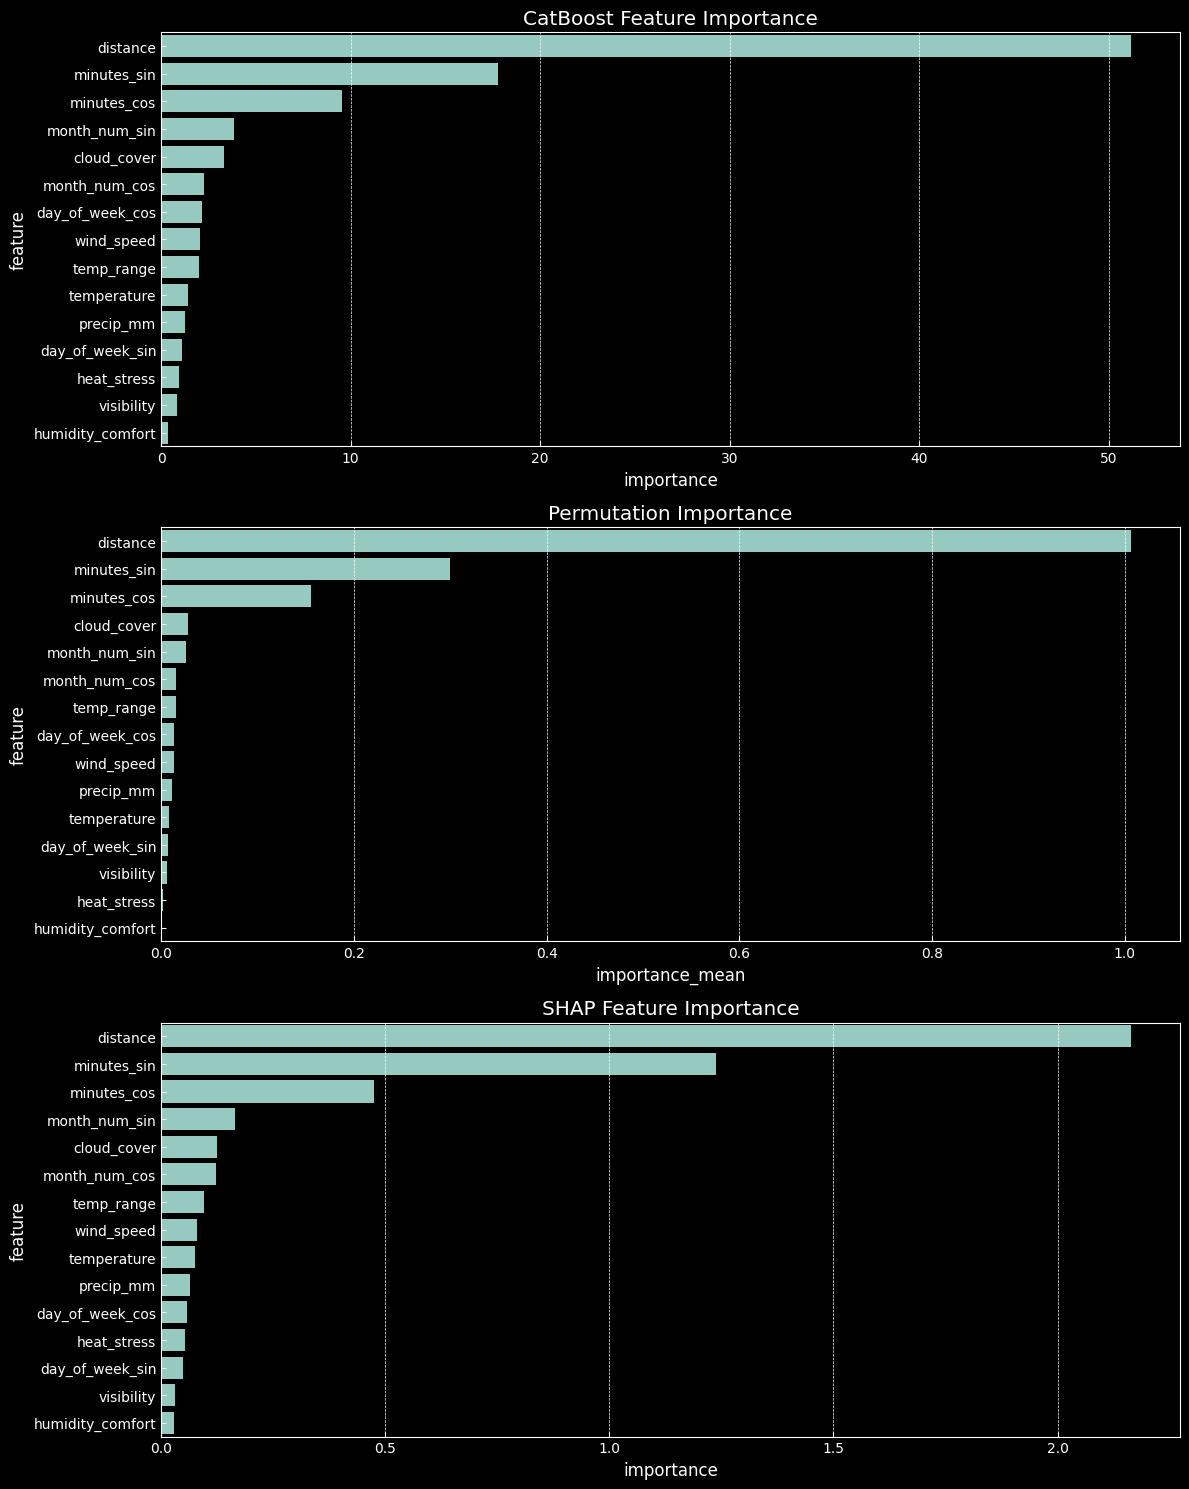

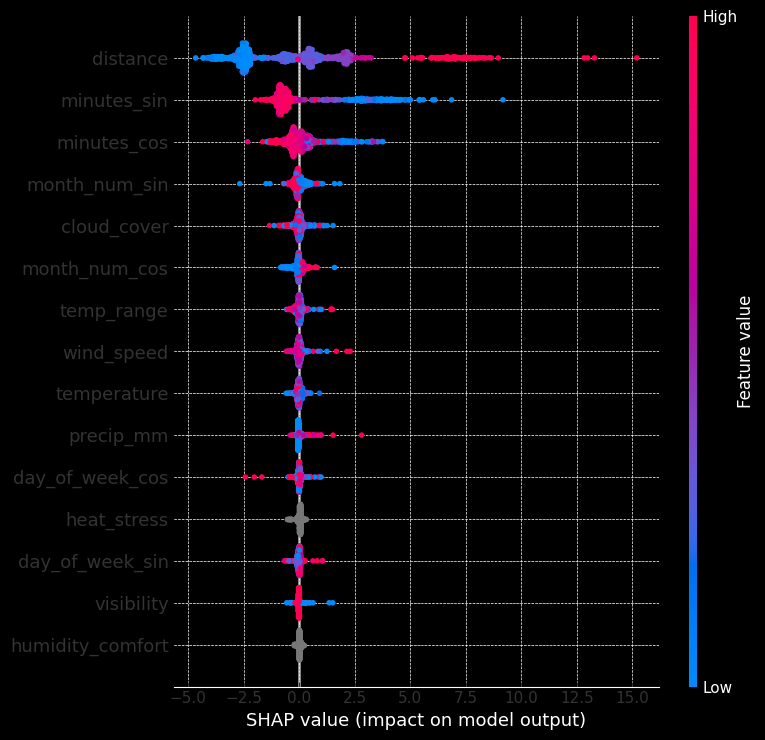


Consensus important features (appearing in at least 2 methods):
1. distance
2. minutes_sin
3. minutes_cos
4. month_num_sin
5. cloud_cover
6. month_num_cos
7. wind_speed
8. temp_range
9. day_of_week_cos
10. temperature
11. precip_mm


In [22]:
from sklearn.feature_selection import SelectFromModel
from catboost import CatBoostRegressor, Pool

def compare_feature_selection_methods(X, y, categorical_features):
    """Compare different feature selection methods"""
    
    # CatBoost feature importance
    cb_model = CatBoostRegressor(
        iterations=1000, learning_rate=0.1, depth=6,
        cat_features=categorical_features, verbose=False, random_state=42
    )
    
    train_pool = Pool(X, y, cat_features=categorical_features, 
                     feature_names=list(X.columns))
    
    cb_model.fit(train_pool)
    
    cb_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': cb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Permutation importance
    from sklearn.inspection import permutation_importance
    
    perm_importance = permutation_importance(cb_model, X, y, 
                                           n_repeats=10, random_state=42)
    
    perm_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance_mean': perm_importance.importances_mean,
        'importance_std': perm_importance.importances_std
    }).sort_values('importance_mean', ascending=False)
    
    # SHAP values
    import shap
    explainer = shap.TreeExplainer(cb_model)
    shap_values = explainer.shap_values(X)
    
    shap_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(shap_values).mean(axis=0)
    }).sort_values('importance', ascending=False)
    
    # Plot results
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    
    sns.barplot(data=cb_importance, x='importance', y='feature', ax=axes[0])
    axes[0].set_title('CatBoost Feature Importance')
    
    sns.barplot(data=perm_importance_df, x='importance_mean', y='feature', ax=axes[1])
    axes[1].set_title('Permutation Importance')
    
    sns.barplot(data=shap_importance, x='importance', y='feature', ax=axes[2])
    axes[2].set_title('SHAP Feature Importance')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X)
    
    return {
        'catboost': cb_importance,
        'permutation': perm_importance_df,
        'shap': shap_importance
    }

def get_top_features(results, n_features=10):
    """Get features that appear in top N across all methods"""
    top_features = {method: df['feature'].head(n_features).tolist() 
                   for method, df in results.items()}
    
    all_features = [f for features in top_features.values() for f in features]
    feature_counts = pd.Series(all_features).value_counts()
    consensus_features = feature_counts[feature_counts >= 2].index.tolist()
    
    print(f"\nConsensus important features (appearing in at least 2 methods):")
    for i, feature in enumerate(consensus_features, 1):
        print(f"{i}. {feature}")
    
    return consensus_features

# Prepare data
categorical_features = ['heat_stress', 'humidity_comfort']
for col in categorical_features:
    vif_filtered_df[col] = vif_filtered_df[col].astype('category')

X = vif_filtered_df.drop('duration', axis=1)
y = vif_filtered_df['duration']

# Run analysis
results = compare_feature_selection_methods(X, y, categorical_features)
consensus_features = get_top_features(results)

## Hyperparameter Tuning 1

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters: {'bagging_temperature': 0, 'border_count': 32, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Best cross-validation score: 0.7863329058430738

Final Model Performance:
Train R2: 0.8965
Test R2: 0.7546
Train RMSE: 1.5236
Test RMSE: 2.0574


c:\Users\USER\Documents\Ramdhan\projects\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\Documents\Ramdhan\projects\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


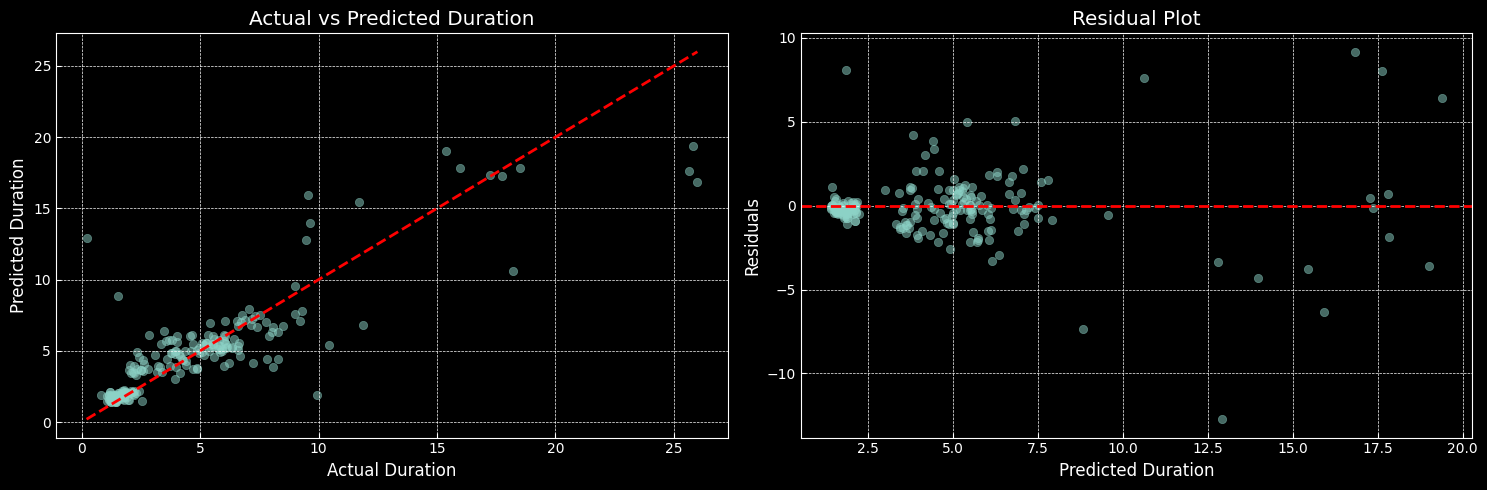

c:\Users\USER\Documents\Ramdhan\projects\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\Documents\Ramdhan\projects\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
from sklearn.metrics import r2_score, mean_squared_error

# 1. Create final dataset with selected features
# selected_features = ['distance', 'minutes_sin', 'minutes_cos', 'month_num_sin', 
#                     'cloud_cover', 'month_num_cos', 'temp_range', 'temperature',
#                     'wind_speed', 'day_of_week_cos', 'duration']

selected_features = ['distance', 'minutes_sin', 'minutes_cos', 'month_num_sin', 'month_num_cos', 'day_of_week_cos', 'duration']

final_df = vif_filtered_df[selected_features].copy()

# 2. Split the data
X = final_df.drop('duration', axis=1)
y = final_df['duration']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train final model with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 128],
    'bagging_temperature': [0, 1],
}

model = CatBoostRegressor(
    verbose=False,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 4. Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# 5. Evaluate final model
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("\nFinal Model Performance:")
print(f"Train R2: {r2_score(y_train, y_pred_train):.4f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False):.4f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.4f}")

# 6. Visualize results
plt.figure(figsize=(15, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration')

# Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Duration')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 7. Save the model and preprocessing information
import joblib

model_info = {
    'model': best_model,
    'features': list(X.columns),
    'best_params': grid_search.best_params_,
    'performance': {
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'train_rmse': mean_squared_error(y_train, y_pred_train, squared=False),
        'test_rmse': mean_squared_error(y_test, y_pred_test, squared=False)
    }
}


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters: {'bagging_temperature': 0, 'border_count': 32, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Best cross-validation score: 0.7695171421759639

Final Model Performance:
Train R2: 0.9136
Test R2: 0.7605
Train RMSE: 1.3923
Test RMSE: 2.0326

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


e:\bus-schedule-app\.venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best parameters: {'bagging_temperature': 0, 'border_count': 32, 'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best cross-validation score: 0.7767292409397821

Final Model Performance:
Train R2: 0.9717
Test R2: 0.8572
Train RMSE: 0.7369
Test RMSE: 1.5444


e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


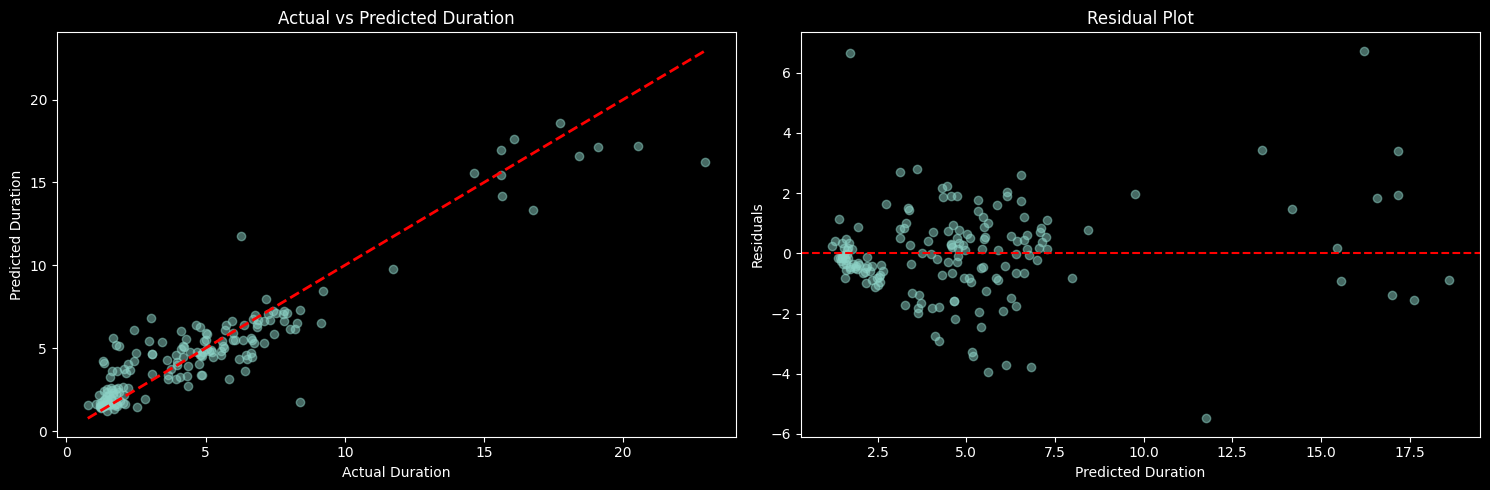

e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


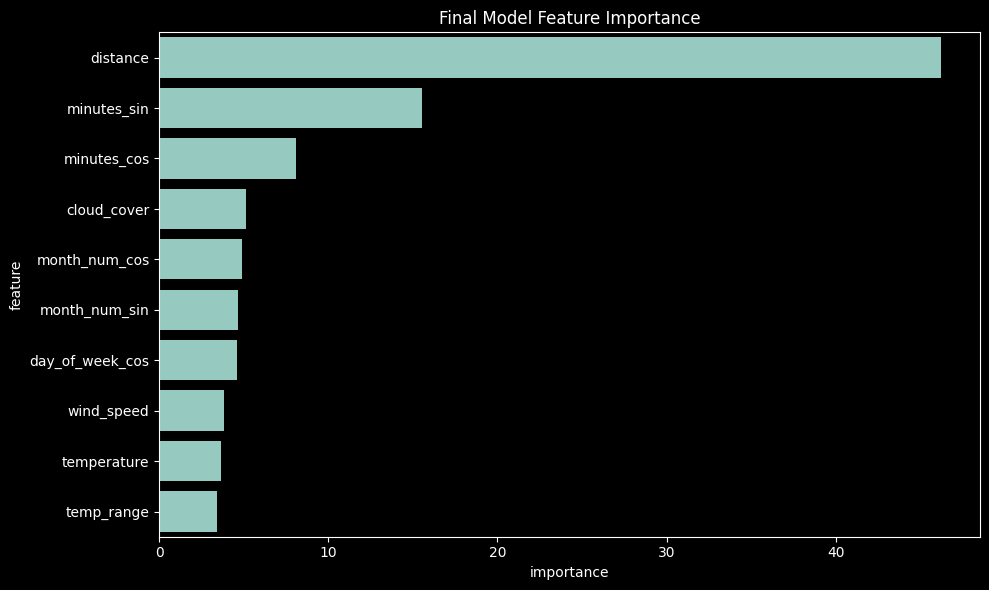

In [59]:
# 1. Create final dataset with selected features
selected_features = ['distance', 'minutes_sin', 'minutes_cos', 'month_num_sin', 
                    'cloud_cover', 'month_num_cos', 'temp_range', 'temperature',
                    'wind_speed', 'day_of_week_cos', 'duration']

final_df = vif_filtered_df[selected_features].copy()

# 2. Split the data
X = final_df.drop('duration', axis=1)
y = final_df['duration']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train final model with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 128],
    'bagging_temperature': [0, 1],
}

model = CatBoostRegressor(
    verbose=False,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 4. Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# 5. Evaluate final model
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("\nFinal Model Performance:")
print(f"Train R2: {r2_score(y_train, y_pred_train):.4f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False):.4f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.4f}")

# 6. Visualize results
plt.figure(figsize=(15, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration')

# Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Duration')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 7. Save the model and preprocessing information
import joblib

model_info = {
    'model': best_model,
    'features': list(X.columns),
    'best_params': grid_search.best_params_,
    'performance': {
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'train_rmse': mean_squared_error(y_train, y_pred_train, squared=False),
        'test_rmse': mean_squared_error(y_test, y_pred_test, squared=False)
    }
}

joblib.dump(model_info, '../models/final_model.joblib')

# 8. Save processed train and test data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('../data/processed/final_train_data.csv', index=False)
test_data.to_csv('../data/processed/final_test_data.csv', index=False)

# 9. Feature importance analysis of final model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Final Model Feature Importance')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning 2 (Final Model)

Fitting 5 folds for each of 64 candidates, totalling 320 fits

Improved Model Performance:
Best parameters: {'bagging_temperature': 0.5, 'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'od_type': 'IncToDec', 'od_wait': 50, 'random_strength': 1}
Best cross-validation score: 0.7723608119147951
Train R2: 0.9637
Test R2: 0.8622
Train RMSE: 0.8335
Test RMSE: 1.5171


e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


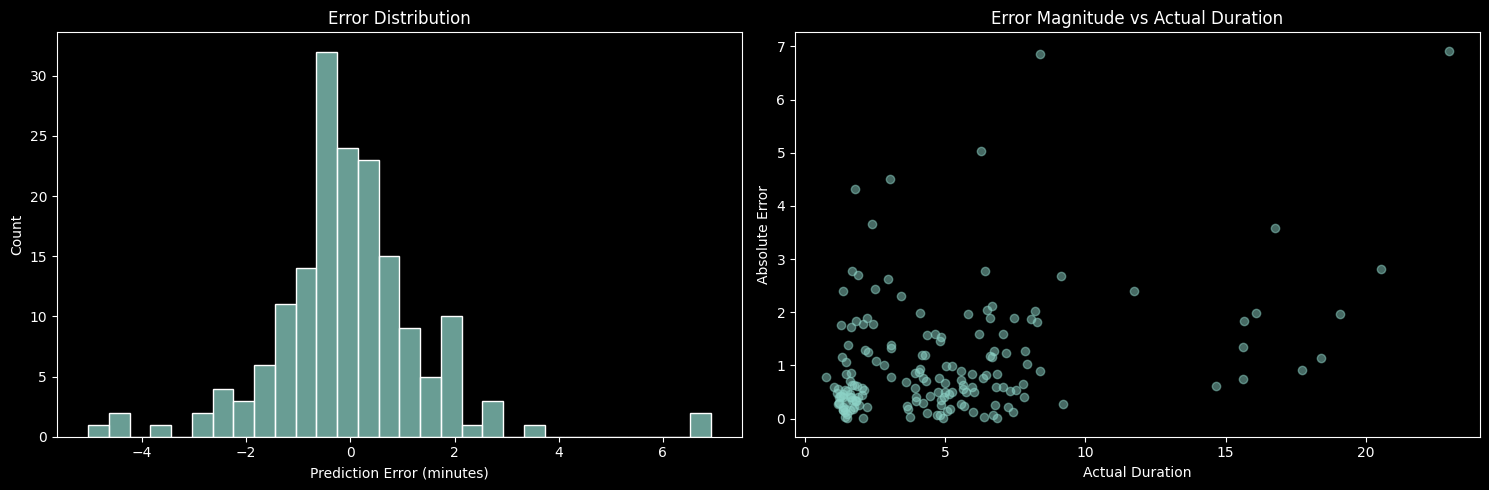


Error Analysis:
Mean Absolute Error: 1.04 minutes
Median Absolute Error: 0.66 minutes
90th percentile of absolute error: 2.15 minutes
95th percentile of absolute error: 2.77 minutes


e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\bus-schedule-app\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
# 1. Try to reduce overfitting with a modified parameter grid
param_grid_v2 = {
    'iterations': [1000, 1500],
    'learning_rate': [0.01, 0.005],
    'depth': [6, 8],
    'l2_leaf_reg': [3, 5],
    'bagging_temperature': [0.5, 1],  # Add some randomness
    'random_strength': [1, 3],        # Add some randomness
    'od_type': ['IncToDec'],         # Enable early stopping
    'od_wait': [50]                  # Wait 50 iterations before stopping
}

grid_search_v2 = GridSearchCV(
    estimator=CatBoostRegressor(verbose=False, random_state=42),
    param_grid=param_grid_v2,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_v2.fit(X_train, y_train)

# Evaluate improved model
best_model_v2 = grid_search_v2.best_estimator_
y_pred_train_v2 = best_model_v2.predict(X_train)
y_pred_test_v2 = best_model_v2.predict(X_test)

print("\nImproved Model Performance:")
print(f"Best parameters:", grid_search_v2.best_params_)
print(f"Best cross-validation score:", grid_search_v2.best_score_)
print(f"Train R2: {r2_score(y_train, y_pred_train_v2):.4f}")
print(f"Test R2: {r2_score(y_test, y_pred_test_v2):.4f}")
print(f"Train RMSE: {mean_squared_error(y_train, y_pred_train_v2, squared=False):.4f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test_v2, squared=False):.4f}")

# Analyze prediction errors
errors = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_test_v2,
    'error': y_test - y_pred_test_v2,
    'abs_error': abs(y_test - y_pred_test_v2)
})

# Plot error analysis
plt.figure(figsize=(15, 5))

# Error distribution
plt.subplot(1, 2, 1)
sns.histplot(data=errors, x='error', bins=30)
plt.title('Error Distribution')
plt.xlabel('Prediction Error (minutes)')

# Error vs Actual
plt.subplot(1, 2, 2)
plt.scatter(errors['actual'], errors['abs_error'], alpha=0.5)
plt.xlabel('Actual Duration')
plt.ylabel('Absolute Error')
plt.title('Error Magnitude vs Actual Duration')

plt.tight_layout()
plt.show()

# Print error statistics
print("\nError Analysis:")
print(f"Mean Absolute Error: {errors['abs_error'].mean():.2f} minutes")
print(f"Median Absolute Error: {errors['abs_error'].median():.2f} minutes")
print(f"90th percentile of absolute error: {errors['abs_error'].quantile(0.9):.2f} minutes")
print(f"95th percentile of absolute error: {errors['abs_error'].quantile(0.95):.2f} minutes")

# Save the better model if it performs better
if r2_score(y_test, y_pred_test_v2) > r2_score(y_test, y_pred_test):
    model_info = {
        'model': best_model_v2,
        'features': list(X.columns),
        'best_params': grid_search_v2.best_params_,
        'performance': {
            'train_r2': r2_score(y_train, y_pred_train_v2),
            'test_r2': r2_score(y_test, y_pred_test_v2),
            'train_rmse': mean_squared_error(y_train, y_pred_train_v2, squared=False),
            'test_rmse': mean_squared_error(y_test, y_pred_test_v2, squared=False)
        }
    }
    joblib.dump(model_info, '../models/final_model_v2.joblib')

**Error Distribution (Left Chart):**
- The distribution is roughly bell-shaped and centered near zero, indicating unbiased predictions.
- Most errors fall between -2 and +2 minutes.
- There's a slight right skew (positive bias), meaning the model occasionally overestimates duration.
- Very few extreme errors beyond ±4 minutes.

**Error Magnitude vs Actual Duration (Right Chart):**
- The errors increase with trip duration (heteroscedasticity).
- Short trips (0-5 minutes) have smaller absolute errors (mostly under 2 minutes).
- Medium trips (5-10 minutes) show moderate errors (2-4 minutes).
- Long trips (>15 minutes) have the largest errors (up to 7 minutes).
- There are a few outliers with high errors, especially for longer durations.

**Error Metrics:**
- **Mean Absolute Error (1.04 minutes):**
  - On average, predictions are off by about 1 minute, which is quite good for bus trip duration prediction.
- **Median Absolute Error (0.66 minutes):**
  - Half of all predictions are within 40 seconds of actual duration.
  - The lower median compared to the mean indicates some large errors are pulling the mean up.
- **Percentiles:**
  - 90% of errors are under 2.15 minutes.
  - 95% of errors are under 2.77 minutes.
  - This shows the model is very reliable for most predictions.

To do:

- Exclude weather features and compare the performance (improve or worse?)
- Exclude 'Calculate Route' on UI
- += minutes --> interval
- documentation of result (PPT)(Preprocessing, Feature Engineering, Modeling)